In [1]:
import pandas as pd
import os
working_dir = '/scratch/network/mk8574/audio_sentiment_challenge'
train_csv = pd.read_csv(os.path.join(working_dir, 'data', 'train.csv'))
train_pred = train_csv['label']

In [2]:
a=train_pred.value_counts()

In [3]:
print(a)

label
0    867
2    859
5    853
3    852
1    848
4    722
Name: count, dtype: int64


In [4]:
id_lst = [[] for _ in range(6)]
for i in range(6):
    id_lst[i] = train_csv["id"][train_csv["label"]==i]

In [5]:
for i in id_lst:
    print(len(i))

867
848
859
852
722
853


In [6]:
print(id_lst[0])

6       TRAIN_0006
7       TRAIN_0007
19      TRAIN_0019
33      TRAIN_0033
37      TRAIN_0037
           ...    
4963    TRAIN_4963
4970    TRAIN_4970
4977    TRAIN_4977
4979    TRAIN_4979
4997    TRAIN_4997
Name: id, Length: 867, dtype: object


In [7]:

import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import wave
import contextlib
from glob import glob
from tqdm import tqdm
import cv2
import plotly.io as pio # Plotly input output
import plotly.express as px # 빠르게 그리는 방법
import plotly.graph_objects as go # 디테일한 설정
train_path = '/scratch/network/mk8574/audio_sentiment_challenge/data/train'
lstrate = []
lst = []
for PATH in tqdm(glob(os.path.join(train_path, '*.wav'))):
    fname = PATH
    
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        lst.append(duration)
        lstrate.append(rate)
working_dir = '/scratch/network/mk8574/audio_sentiment_challenge'
submission = pd.read_csv(os.path.join(working_dir, 'baseline_dy', 'train.csv'))
submission['duration'] = lst
submission.to_csv(os.path.join(working_dir, 'baseline_dy', 'duration.csv'), index=False)

100%|██████████| 5001/5001 [00:01<00:00, 3772.06it/s]


In [8]:
print(max(lstrate),min(lstrate))

16000 16000


In [9]:
sum(lst)/len(lst)

2.5426193136372675

In [10]:
print(max(lst),min(lst))

4.8715625 1.3346875


(array([  4.,  31.,  51., 152., 184., 345., 319., 487., 464., 599., 397.,
        483., 297., 353., 199., 205., 105.,  80.,  72.,  40.,  49.,  20.,
         22.,  10.,  13.,   6.,   5.,   1.,   0.,   8.]),
 array([1.3346875 , 1.45258333, 1.57047917, 1.688375  , 1.80627083,
        1.92416667, 2.0420625 , 2.15995833, 2.27785417, 2.39575   ,
        2.51364583, 2.63154167, 2.7494375 , 2.86733333, 2.98522917,
        3.103125  , 3.22102083, 3.33891667, 3.4568125 , 3.57470833,
        3.69260417, 3.8105    , 3.92839583, 4.04629167, 4.1641875 ,
        4.28208333, 4.39997917, 4.517875  , 4.63577083, 4.75366667,
        4.8715625 ]),
 <BarContainer object of 30 artists>)

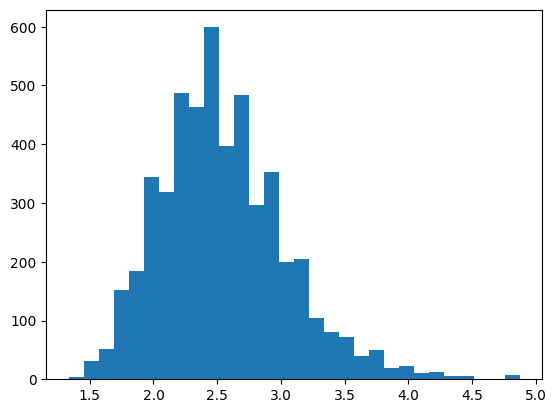

In [11]:
import matplotlib.pyplot as plt

plt.hist(lst,bins=30)

In [12]:
train_path = '/scratch/network/mk8574/audio_sentiment_challenge/data/train'
dur_id=[[] for _ in range(6)]
import pandas as pd

for i in range(6):
    for idx in id_lst[i]:
        
        fname = os.path.join(train_path,idx+".wav")
        

        with contextlib.closing(wave.open(fname,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            dur_id[i].append(duration)
            

In [13]:
emo_dict ={
0:"angry",
1: "fear",
2:"sad",
3: "disgust",
4: "neutral",
5:"happy"

}

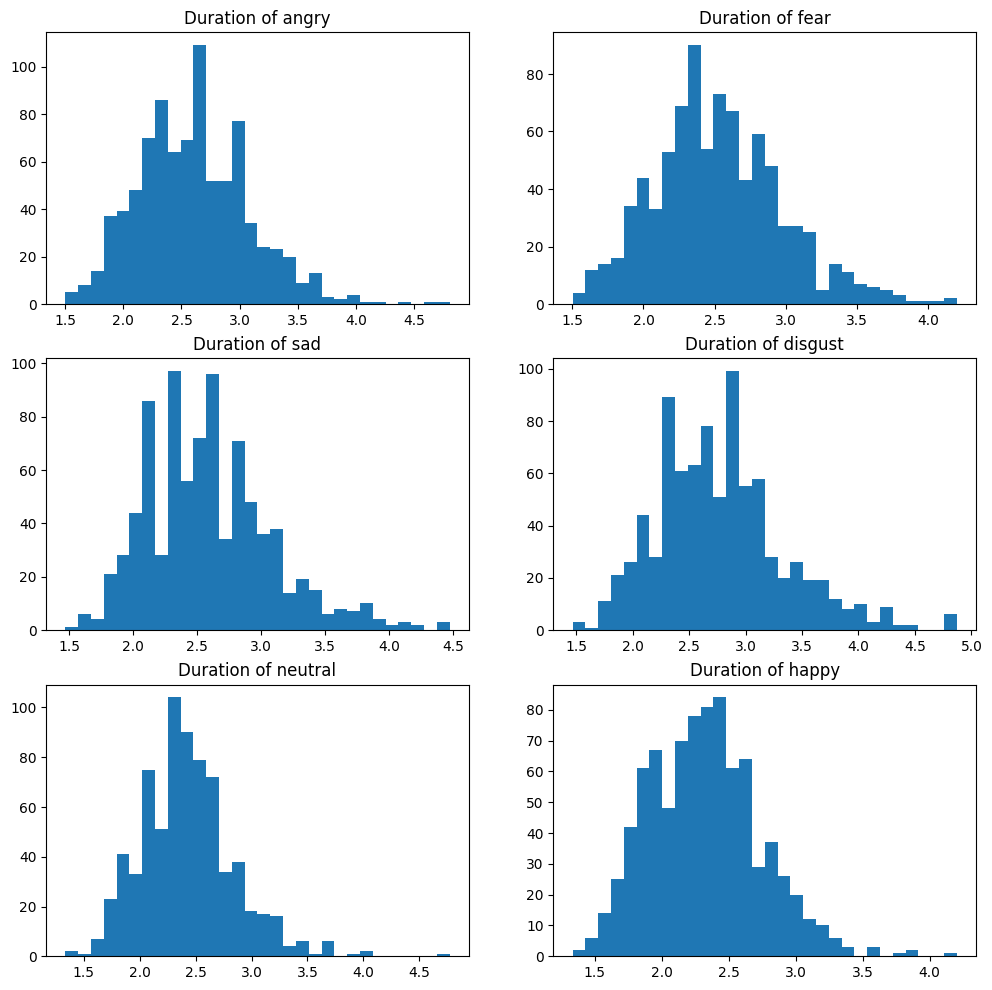

In [14]:
fig ,axs = plt.subplots(3,2,figsize=(12,12))
for i in range(3):
    for j in range(2):
        axs[i,j].hist(dur_id[i*2+j],bins=30)
        axs[i,j].set_title(f'Duration of {emo_dict[i*2+j]}')

In [15]:
for i in range(6):
    print(sum(dur_id[i])/len(dur_id[i]))

2.603623269896192
2.5246286851415056
2.5888649592549466
2.773852772887326
2.4254742036011057
2.3201204572098457


In [16]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
working_dir = '/scratch/network/mk8574/audio_sentiment_challenge'
train= pd.read_csv(os.path.join(working_dir, 'data', 'train.csv'))
from random import randrange
def fourier_transform(num = 0):
    # Audio Sample Directory
    sample = os.listdir('/scratch/network/mk8574/audio_sentiment_challenge/data/train')
    temp = train[train.label == num].id
    
    
    fig ,axs = plt.subplots(3,2,figsize=(12,12))

    for i in range(3):
        for j in range(2):
            randn = randrange(len(temp))
            file_name = temp[temp.index[randn]]

            file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
            # Get Audio from the location
            data,sample_rate = librosa.load(file)

            fft = np.fft.fft(data) 

            magnitude = np.abs(fft)
            frequency = np.linspace(0, sample_rate, len(magnitude))

            left_frequency = frequency[:int(len(frequency)/2)]
            left_magnitude = magnitude[:int(len(magnitude)/2)]

            #fig = plt.figure(figsize = (14,5))
            axs[i,j].plot(left_frequency, left_magnitude)
            
            # axs[i,j].xlabel("Frequency")
            # axs[i,j].ylabel("Magnitude")
            # axs[i,j].title(f"Fourier transform of audio label {num}")
    plt.suptitle(f'Fourier transform of {emo_dict[num]}')


In [18]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def fourier_transform(path_wave):
    data,sample_rate = librosa.load(path_wave)
    fft = np.fft.fft(data) 
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    plt.plot(left_frequency, left_magnitude)

    plt.title('Fourier transform')
    plt.show()
def get_audio(path_wave):

    # Get Audio from the location
    data,sample_rate = librosa.load(path_wave)
    
    # Plot the audio wave
    plt.plot(data)
    plt.title('Waveform')
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

In [19]:
def get_audio(path_wave):

    # Get Audio from the location
    data,sample_rate = librosa.load(path_wave)
    
    # Plot the audio wave
    plt.plot(data)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

In [20]:
def RMS_wave(path_wave):

    data,sample_rate = librosa.load(path_wave)

    rms = librosa.feature.rms(y=data)


    times = librosa.times_like(rms)
    
    plt.plot(times, rms[0])
    plt.title("RMS")
    plt.show()
    

In [21]:
def RMS_wave(path_wave):

    data,sample_rate = librosa.load(path_wave)

    rms = librosa.feature.rms(y=data)


    times = librosa.times_like(rms)
    
    plt.plot(times, rms[0])
    plt.title("RMS")
    plt.show()
    

In [22]:
def Mel_s(path_wave, frame_length = 0.025, frame_stride = 0.010):

    data,sample_rate = librosa.load(path_wave)

    input_nfft = int(round(sample_rate*frame_length))
    input_stride = int(round(sample_rate*frame_stride))

    S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))

    S_dB  = librosa.power_to_db(S, ref=np.max)
    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(S_dB, 
                             sr=sample_rate, 
                             hop_length=input_stride,
                             x_axis='time',
                             y_axis='log')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel Sepctogram")
    

In [23]:
def mfcc(path_wave, frame_length = 0.025, frame_stride = 0.010):

    data,sample_rate = librosa.load(path_wave)

    input_nfft = int(round(sample_rate*frame_length))
    input_stride = int(round(sample_rate*frame_stride))

    S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
    S_dB  = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=20)

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(delta2_mfcc)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title('MFCC')
    plt.colorbar()
    plt.tight_layout()
    # librosa.display.specshow(S_dB, 
    #                          sr=sample_rate, 
    #                          hop_length=input_stride,
    #                          x_axis='time',
    #                          y_axis='log')
    

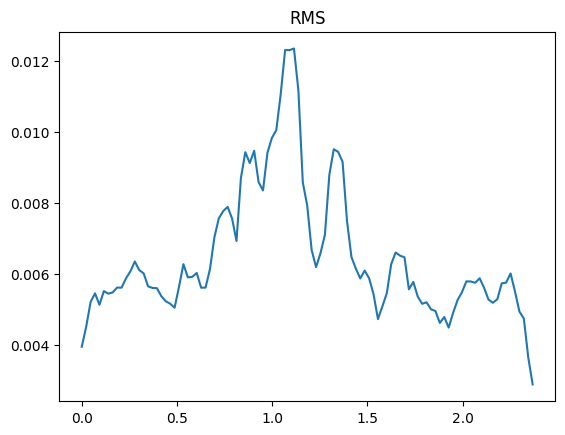

In [25]:
working_dir = '/scratch/network/mk8574/audio_sentiment_challenge'
train= pd.read_csv(os.path.join(working_dir, 'data', 'train.csv'))
file_name = train["id"][0]
file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
#ourier_transform(file)
#et_audio(file)
RMS_wave(file)


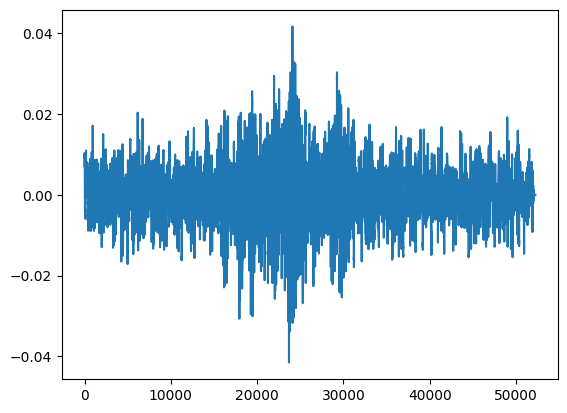

In [26]:
get_audio(file)

In [27]:

def get_audio(num = 0):
    # Audio Sample Directory
    sample = os.listdir('/scratch/network/mk8574/audio_sentiment_challenge/data/train')
    temp = train[train.label == num].id
    file_name = temp[temp.index[0]]
    
    file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    plt.plot(data)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

In [ ]:
from random import randrange
def get_audios(num = 0):
    # Audio Sample Directory
    sample = os.listdir('/scratch/network/mk8574/audio_sentiment_challenge/data/train')
    temp = train[train.label == num].id
    fig ,axs = plt.subplots(3,2,figsize=(12,12))

    for i in range(3):
        for j in range(2):
            randn = randrange(len(temp))
            file_name = temp[temp.index[randn]]


            file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
            # Get Audio from the location
            data,sample_rate = librosa.load(file)

            # Plot the audio wave
            axs[i,j].plot(data)
    plt.suptitle(f'Waveform of {emo_dict[num]}')

In [ ]:
get_audios()



In [ ]:
fourier_transform(3)

In [ ]:
import os
from random import randrange
def Mel_s(num = 0, frame_length = 0.025, frame_stride = 0.010):

    sample = os.listdir('/scratch/network/mk8574/audio_sentiment_challenge/data/train')
    temp = train[train.label == num].id

    for i in range(3):
        for j in range(2):
            randn = randrange(len(temp))
            file_name = temp[temp.index[randn]]
    
            file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
            data,sample_rate = librosa.load(file, sr = 16000)

            input_nfft = int(round(sample_rate*frame_length))
            input_stride = int(round(sample_rate*frame_stride))

            S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)

            print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))

            S_dB  = librosa.power_to_db(S, ref=np.max)
            fig = plt.figure(figsize = (14,5))
            librosa.display.specshow(S_dB, 
                                     sr=sample_rate, 
                                     hop_length=input_stride,
                                     x_axis='time',
                                     y_axis='log')
            plt.xlabel("Time")
            plt.ylabel("Frequency")
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Waveform of {emo_dict[num]} id {file_name}')
            plt.show()

In [ ]:
import os
from random import randrange
import torchaudio
def Mel_s_mask(num = 0, frame_length = 0.025, frame_stride = 0.010):

    sample = os.listdir('/scratch/network/mk8574/audio_sentiment_challenge/data/train')
    temp = train[train.label == num].id
    masking = torchaudio.transforms.TimeMasking(time_mask_param=80)
    for i in range(3):
        for j in range(2):
            randn = randrange(len(temp))
            file_name = temp[temp.index[randn]]
    
            file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
            waveform, sample_rate = torchaudio.load(file, normalize=True)
            transform = torchaudio.transforms.Spectrogram(n_fft=800)
            
            input_nfft = int(round(sample_rate*frame_length))
            input_stride = int(round(sample_rate*frame_stride))

            #S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
            S = transform(waveform)
            #print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))

            #S_dB  = librosa.power_to_db(S, ref=np.max)
            S_dB = masking(S)
            
            # fig = plt.figure(figsize = (14,5))
            # librosa.display.specshow(S_dB, 
            #                          sr=sample_rate, 
            #                          hop_length=input_stride,
            #                          x_axis='time',
            #                          y_axis='log')
            # plt.xlabel("Time")
            # plt.ylabel("Frequency")
            # plt.colorbar(format='%+2.0f dB')
            # plt.title(f'Waveform of {emo_dict[num]} id {file_name}')
            # plt.show()

In [ ]:
sample = os.listdir('/scratch/network/mk8574/audio_sentiment_challenge/data/train')
num=0
temp = train[train.label == num].id
masking = torchaudio.transforms.TimeMasking(time_mask_param=1000)
frame_length = 0.025
frame_stride = 0.010
for i in range(3):
    for j in range(2):
        randn = randrange(len(temp))
        file_name = temp[temp.index[randn]]

        file = '/scratch/network/mk8574/audio_sentiment_challenge/data/train/' + file_name +".wav"
        waveform, sample_rate = torchaudio.load(file, normalize=True)
        transform = torchaudio.transforms.Spectrogram(n_fft=800)

        input_nfft = int(round(sample_rate*frame_length))
        input_stride = int(round(sample_rate*frame_stride))

        #S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
        S = transform(waveform)
        #print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))

        #S_dB  = librosa.power_to_db(S, ref=np.max)
        S_dB = masking(S)

In [ ]:
Mel_s_mask()

In [ ]:
import torch
def plot():
    def plot_spec(ax, spec, title):
        ax.set_title(title)
        ax.imshow(librosa.amplitude_to_db(spec), origin="lower", aspect="auto")

    fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
    plot_spec(axes[0], torch.abs(S_dB[0]), title="Stretched x1.2")
    plot_spec(axes[1], torch.abs(S[0]), title="Stretched x1.2")
    
    fig.tight_layout()


plot()

In [ ]:
idx_sel = ["angry",
 "fear",
"sad",
 "disgust",
 "neutral",
"happy"
]
train_dur= pd.read_csv(os.path.join(working_dir, 'baseline_dy', 'duration.csv'))
idx_lst = [0,1,2,3,4,5]

_, ax = plt.subplots(figsize=(20, 4))
sns.violinplot(ax=ax, x="label", y="duration", data=train_dur[(train_dur.label.isin(idx_lst).values)])

plt.xticks(rotation=90)
plt.title('Distribution of audio durations, per label', fontsize=16)
plt.show()

In [ ]:
from radam import radam